In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

xls = r'Stream_Restoration_Potential.xls'
df = pd.read_excel(xls)

In [3]:
df.head()

,OBJECTID,Rest_Pot,Shape.STLength(),SHAPE_Leng,Area_RAS,Area_RC,Width_RAS,Channel_Cl,Comment_1,Comment_2,...,WD_Ratio,Width_RC,Source,SRPID,Q_RAS,Field_Veri,BFW_Field,Q_Field,BFD_Field,DA_10_100_
0,1,Preservation,4060.846999,4060.846999,55.0,35.0,72.0,Earthen,"No obvious signs on aerial photograph, but tig...",Development in the floodplain.,...,95.0,24.0,LC-WMP,LC-1,114.0,A,0.0,0.0,0.0,NO
1,2,Preservation,2822.120058,2822.120058,20.0,15.0,35.0,Earthen,No obvious signs on aerial photograph.,Rural.,...,62.0,14.0,LC-WMP,LC-2,49.0,A,0.0,0.0,0.0,NO
2,3,NCD1,4461.039188,4461.039188,34.0,18.0,39.0,Vegetated,"Hard to tell on aerial, but there may be erosion.",Development is nearby.,...,44.0,16.0,LC-WMP,LC-3,60.0,A,0.0,0.0,0.0,NO
3,4,Preservation,2084.146316,2084.146316,18.0,18.0,28.0,Earthen,No obvious signs of instability on aerial.,Urban setting.,...,44.0,16.0,LC-WMP,LC-4,59.0,A,0.0,0.0,0.0,NO
4,5,NCD1,4252.007292,4252.007292,0.0,28.0,0.0,Grass,ome instability can be seen on aerial.,"Cleared veg, urban area.",...,0.0,21.0,LC-WMP,LC-5,91.0,A,0.0,0.0,0.0,NO


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 51 columns):
OBJECTID            3030 non-null int64
Rest_Pot            3030 non-null object
Shape.STLength()    3030 non-null float64
SHAPE_Leng          2892 non-null float64
Area_RAS            3030 non-null float64
Area_RC             3030 non-null float64
Width_RAS           3030 non-null float64
Channel_Cl          3028 non-null object
Comment_1           3030 non-null object
Comment_2           3030 non-null object
Cum_DA              3030 non-null float64
DC_ID               2717 non-null object
DE                  2963 non-null float64
Depth_RAS           3030 non-null float64
Depth_RC            3030 non-null float64
ER                  3030 non-null float64
ER_pot              2963 non-null float64
FPW                 3030 non-null float64
Length              2717 non-null float64
HMS_node            2688 non-null object
Hydro_Type          3030 non-null object
K                   

In [5]:
df.describe()


,OBJECTID,Shape.STLength(),SHAPE_Leng,Area_RAS,Area_RC,Width_RAS,Cum_DA,DE,Depth_RAS,Depth_RC,...,Q_1_1,Q_1_5,Q_RC,Slope,WD_Ratio,Width_RC,Q_RAS,BFW_Field,Q_Field,BFD_Field
count,3030.000000,3030.000000,2892.000000,3030.000000,3030.000000,3030.000000,3030.000000,2963.000000,3030.000000,3030.000000,...,3030.000000,3030.000000,3030.000000,3029.000000,3030.000000,3030.000000,3030.000000,2717.0,2717.0,2717.0
mean,1527.411221,4765.439788,4807.721720,96.821817,23.069528,71.612155,15.972957,14.297874,1.711993,0.575929,...,60.179684,99.720549,209.572663,0.257452,121.189233,11.331818,240.427638,0.0,0.0,0.0
std,883.007735,5107.381968,5179.974541,212.578678,76.453258,99.757676,61.165845,97.169368,2.436253,0.842403,...,283.309145,384.382748,704.054680,13.481792,525.107209,20.546024,879.049740,0.0,0.0,0.0
min,1.000000,50.199707,50.199707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,768.250000,1985.734188,1992.665016,13.466156,0.000000,23.000000,0.050245,0.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.002786,16.922143,0.000000,0.000000,0.0,0.0,0.0
50%,1525.500000,3269.791781,3284.246570,39.718791,0.000000,41.000000,1.069496,0.000000,0.840000,0.000000,...,0.000000,0.000000,34.738664,0.007100,36.714430,0.000000,35.314667,0.0,0.0,0.0
75%,2282.750000,5826.787663,5876.147188,91.708428,16.250000,85.838750,4.987775,0.000000,1.900000,0.970000,...,25.750000,33.750000,131.551891,0.015000,93.851753,17.107583,141.258666,0.0,0.0,0.0
max,3194.000000,129436.098083,129436.098083,3358.336800,780.000000,1366.000000,779.610000,2900.000000,31.984160,4.860000,...,3713.000000,4336.000000,9060.390000,742.000000,15131.285710,160.000000,20729.709294,0.0,0.0,0.0


## Analyze the comments columns

In [6]:
# Transform the two comments columns into separate lists

comments1 = []
comments2 = []

for i in range(len(df)):
    comments1.append(df.iloc[i]['Comment_1'])
    comments2.append(df.iloc[i]['Comment_2'])

print (comments1, comments2)

['No obvious signs on aerial photograph, but tight meander bend may indicate bank erosion.', 'No obvious signs on aerial photograph.', 'Hard to tell on aerial, but there may be erosion.', 'No obvious signs of instability on aerial.', 'ome instability can be seen on aerial.', 'No visible on aerial.', 'Some bank erosion.', 'Nothing obvious on the aerial.', 'No obvious signs of instability on aerial.  u/s dam.', 'Some erosion protection is visible on aerial photo.  Golf course.', 'No obvious signs of instability on aerial.', "No obvious signs of instability on aerial. Hard to tell. Google Street view is limited, but doesn't look like any erosion.", "No obvious signs of instability on aerial. Hard to tell. Google Street view is limited, but doesn't look like any erosion.", 'No visible on the aerial.', 'May be some bed scour.', 'No visible signs of instability.', 'Head cutting (personal knowledge).', 'No visible signs of instability.', 'Possible erosion since classified as G channel.', 'Pos

In [7]:
# Create tf-idf frequency array

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(comments2)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.64431421 ...,  0.          0.          0.        ]
 [ 0.          0.          0.64431421 ...,  0.          0.          0.        ]]
['above', 'access', 'acess', 'active', 'activity', 'adjacen', 'adjacenct', 'adjacent', 'advised', 'aerial', 'ag', 'aggradation', 'agriculatural', 'agricultural', 'agriculture', 'airport', 'all', 'alone', 'along', 'an', 'analyze', 'and', 'appear', 'appears', 'area', 'areas', 'around', 'as', 'at', 'bank', 'banks', 'based', 'bc', 'be', 'because', 'bed', 'bedrock', 'been', 'below', 'bends', 'borderline', 'both', 'braided', 'breaks', 'buffer', 'built', 'but', 'by', 'can', 'catchment', 'cattle', 'channel', 'chann

In [76]:
# Apply non-negative matrix factorization to word arrays

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF()#n_components=4)

# Fit the model to articles
model.fit(csr_mat)

# Transform the articles: nmf_features
nmf_features = model.transform(csr_mat)

# Print the NMF features
print(nmf_features)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.00028653]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [75]:
# Determine topics from the NMF model to find most common components

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[1]

# Print result of nlargest
# print (model.components_)
print (components_df)
print (component)
# print(component.nlargest())

(4, 290)
      above    access         acess        active  activity   adjacen  \
0  0.000007  0.000707  4.320746e-04  2.932220e-06  0.000002  0.005372   
1  0.000000  0.000001  4.815971e-09  2.865155e-09  0.000003  0.000000   
2  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000  0.003353   
3  0.000073  0.000023  0.000000e+00  0.000000e+00  0.001178  0.000000   

   adjacenct  adjacent   advised        aerial    ...         vehicles  \
0   0.000000  0.381160  0.000000  0.000000e+00    ...     0.000000e+00   
1   0.000000  0.000000  0.000000  7.412626e-08    ...     2.603861e-08   
2   0.006197  0.000000  0.000000  1.282700e-03    ...     0.000000e+00   
3   0.000875  0.437571  0.000139  1.057847e-04    ...     7.936083e-07   

   verification      very  vicinity   visible       was      with    within  \
0      0.000243  0.000065  0.000000  0.000000  0.000465  0.000833  0.000446   
1      0.000015  0.000003  0.000002  0.000000  0.000056  0.000021  0.000000   
2      0.000000  

## Clustering on numeric values

In [26]:
# Determining Optimal number of clusters

# creat numeric dataframe
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html?highlight=dtypes#pandas.DataFrame.select_dtypes
df_numeric = df.copy()
df_numeric = df_numeric.select_dtypes(include = ['number'])

print (df_numeric.columns.values)
print (len(df_numeric))

df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
df_numeric.dropna(axis=0, how='any', inplace=True)

print (len(df_numeric))

df_numeric.describe()

['OBJECTID' 'Shape.STLength()' 'SHAPE_Leng' 'Area_RAS' 'Area_RC'
 'Width_RAS' 'Cum_DA' 'DE' 'Depth_RAS' 'Depth_RC' 'ER' 'ER_pot' 'FPW'
 'Length' 'K' 'Max_Depth' 'MBW_1' 'MBW_2' 'Q_1_1' 'Q_1_5' 'Q_RC' 'Slope'
 'WD_Ratio' 'Width_RC' 'Q_RAS' 'BFW_Field' 'Q_Field' 'BFD_Field']
3030
2717


,OBJECTID,Shape.STLength(),SHAPE_Leng,Area_RAS,Area_RC,Width_RAS,Cum_DA,DE,Depth_RAS,Depth_RC,...,Q_1_1,Q_1_5,Q_RC,Slope,WD_Ratio,Width_RC,Q_RAS,BFW_Field,Q_Field,BFD_Field
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,...,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.0,2717.0,2717.0
mean,1367.333824,4878.034231,4878.034231,91.671710,22.605095,57.284085,16.490263,15.389989,1.826290,0.528057,...,30.109771,62.028181,222.853476,0.286168,60.509408,10.098320,246.817347,0.0,0.0,0.0
std,786.810335,5276.161097,5276.161097,187.982533,79.764640,65.306758,63.401689,101.130965,2.524725,0.858398,...,123.517618,266.376520,741.147794,14.234823,90.451791,21.078032,913.430548,0.0,0.0,0.0
min,1.000000,50.199707,50.199707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,690.000000,1998.118751,1998.118751,11.732651,0.000000,21.000000,0.029185,0.000000,0.470921,0.000000,...,0.000000,0.000000,0.000000,0.002719,15.058594,0.000000,0.000000,0.0,0.0,0.0
50%,1369.000000,3320.979539,3320.979539,34.875036,0.000000,38.000000,0.740000,0.000000,0.950000,0.000000,...,0.000000,0.000000,21.000000,0.007159,31.640000,0.000000,0.000000,0.0,0.0,0.0
75%,2048.000000,5955.576413,5955.576413,92.246623,13.880000,67.190000,5.480000,0.000000,2.100000,0.970000,...,0.000000,0.000000,152.181654,0.015957,70.103998,14.000000,156.000000,0.0,0.0,0.0
max,2727.000000,129436.098083,129436.098083,3358.336800,780.000000,800.770000,779.610000,2900.000000,31.984160,4.860000,...,1850.804000,3539.500000,9060.390000,742.000000,1277.000000,160.000000,20729.709294,0.0,0.0,0.0


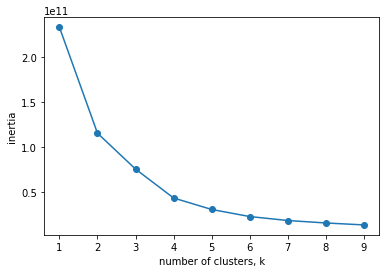

In [27]:
# Create range object for assessing # of clusters
ks = range(1, 10)

# Create empty list to track inertia
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    km_model = KMeans(n_clusters=k)
    
    # Fit model to samples
    km_model.fit(df_numeric)
    
    # Append the inertia to the list of inertias
    inertias.append(km_model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [28]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

In [29]:
# Fit the pipeline to articles
pipeline.fit(csr_mat)

# Calculate the cluster labels: labels
cluster = pipeline.predict(csr_mat)

# Get River segment names
segment = []
for i in range(len(df)):
    segment.append(df.iloc[i]['SegName'])


# Create a DataFrame aligning cluster labels and river segments: df
df_labels = pd.DataFrame({'cluster': cluster, 'segment': segment})

# Display df sorted by cluster label
print(df_labels.sort_values('cluster'))

      cluster                                      segment
328         0    Panther Springs Creek Unnamed Tributary 2
1565        0                               Coalkiln Creek
464         0                     Salado Creek Tributary F
336         0                        Panther Springs Creek
668         0                     North Prong Medina River
335         0            Panther Springs Creek Tributary A
1331        0                                      Unknown
665         0                     North Prong Medina River
333         0            Panther Springs Creek Tributary A
466         0                                 Salado Creek
662         0                                 Medina River
467         0                                 Salado Creek
330         0                        Panther Springs Creek
1579        0                                      Unknown
1580        0                                      Unknown
468         0                                 Salado Cre

## Drainage Area Analysis

In [37]:
df['Cum_DA'].describe()

count    3030.000000
mean       15.972957
std        61.165845
min         0.000000
25%         0.050245
50%         1.069496
75%         4.987775
max       779.610000
Name: Cum_DA, dtype: float64

In [38]:
np.percentile(df['Cum_DA'], 75, axis=None)

4.9877750000000001

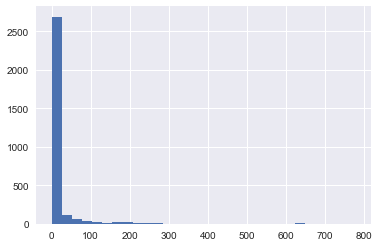

In [52]:
plt.hist(df['Cum_DA'],bins=30)
plt.ylabel = 'count'
plt.show()

In [40]:
# Riparian_C_set = set(df['Rosgen'])
# Riparian_C_set

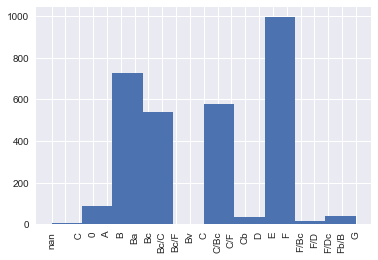

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

plt.hist(df['Rosgen'])
plt.ylabel = 'count'
plt.xlabel = 'stream type'
plt.title = 'Rosgen Stream Types'
plt.xticks(rotation=90)
plt.show()

# Evaluate Restoration Classifications

In [54]:
rest_set = set(df['Rest_Pot'])
rest_set

{' ', 'NCD1', 'NCD2', 'Preservation', 'Rehabilitation', 'Restoration'}